In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Classification

Its a form of supervised learning. Model is trained on a training set to detect various class. Simplest form of classification is binary (0 and 1, cats or not-cats).

The types of classification are:
1. Single class classifier (Binary)
2. Multi-class classifier

The types of classification algorithms are:
1. Logistic regression
2. Decision tree classifier 
3. Perceptron & SVM classifier 
4. Naive-baise classifier

## Binary classification

In [25]:
# Lets explore a database for binary classification
df = pd.read_csv('data/diabetes.csv')
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [26]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [27]:
# Look for null values
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

For feature:  PREGNANCIES


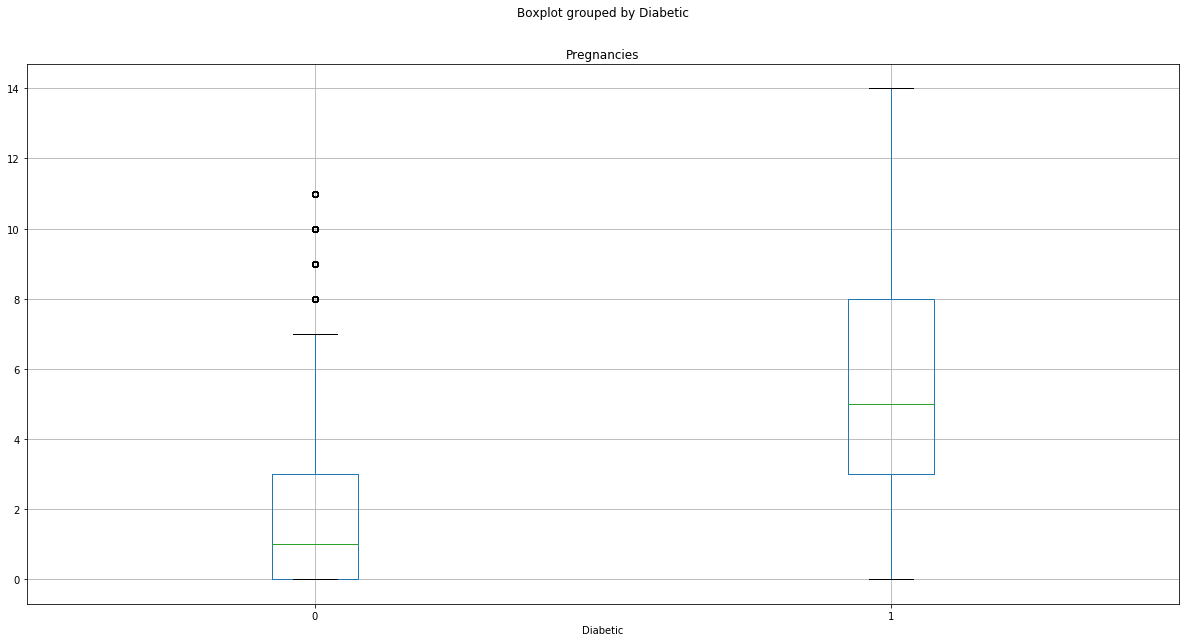

For feature:  PLASMAGLUCOSE


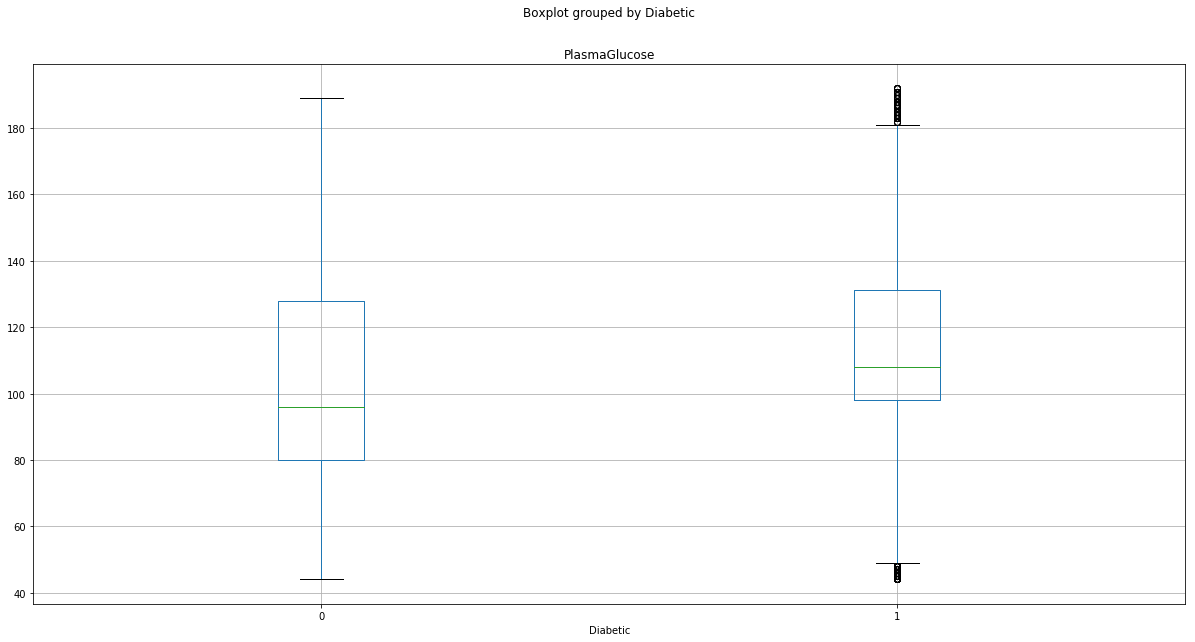

For feature:  DIASTOLICBLOODPRESSURE


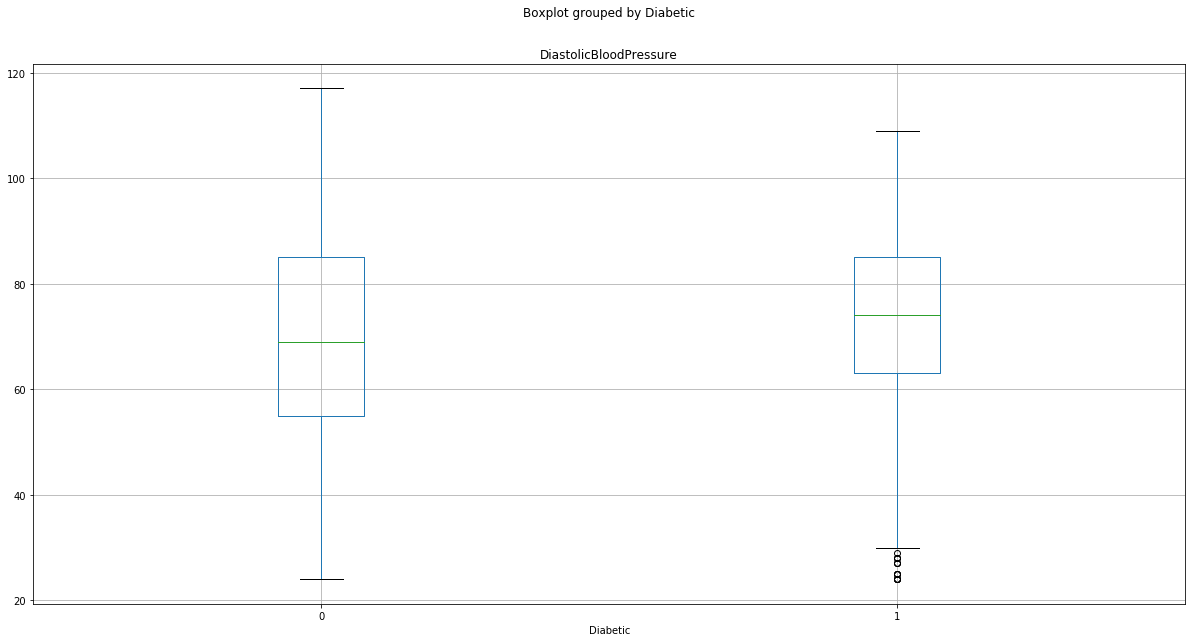

For feature:  TRICEPSTHICKNESS


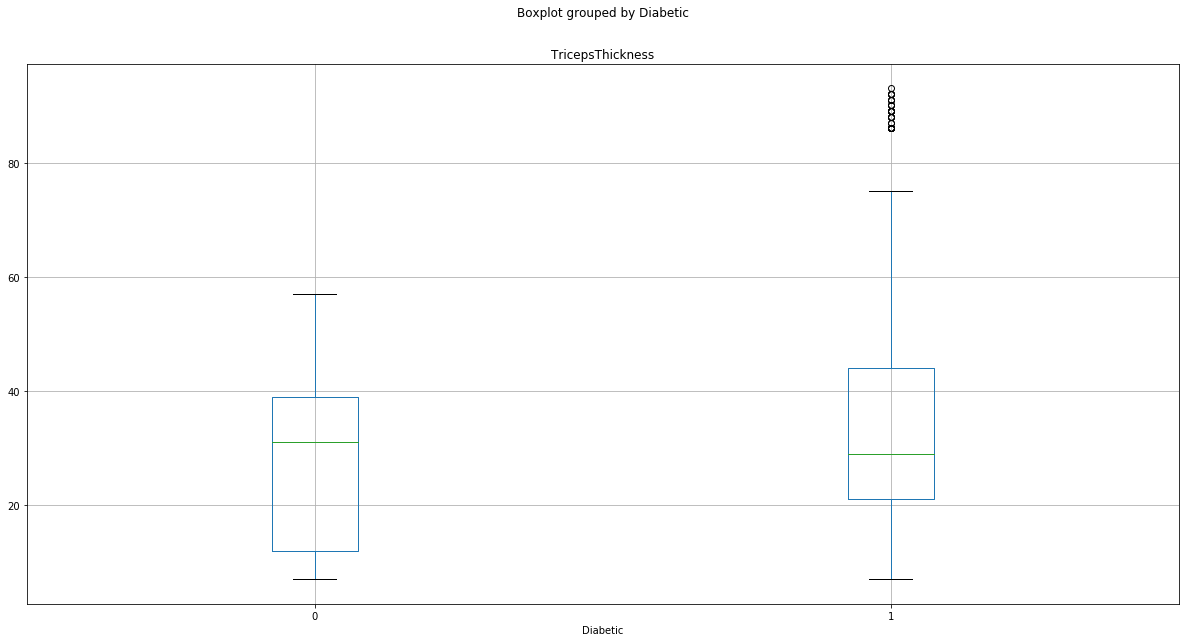

For feature:  SERUMINSULIN


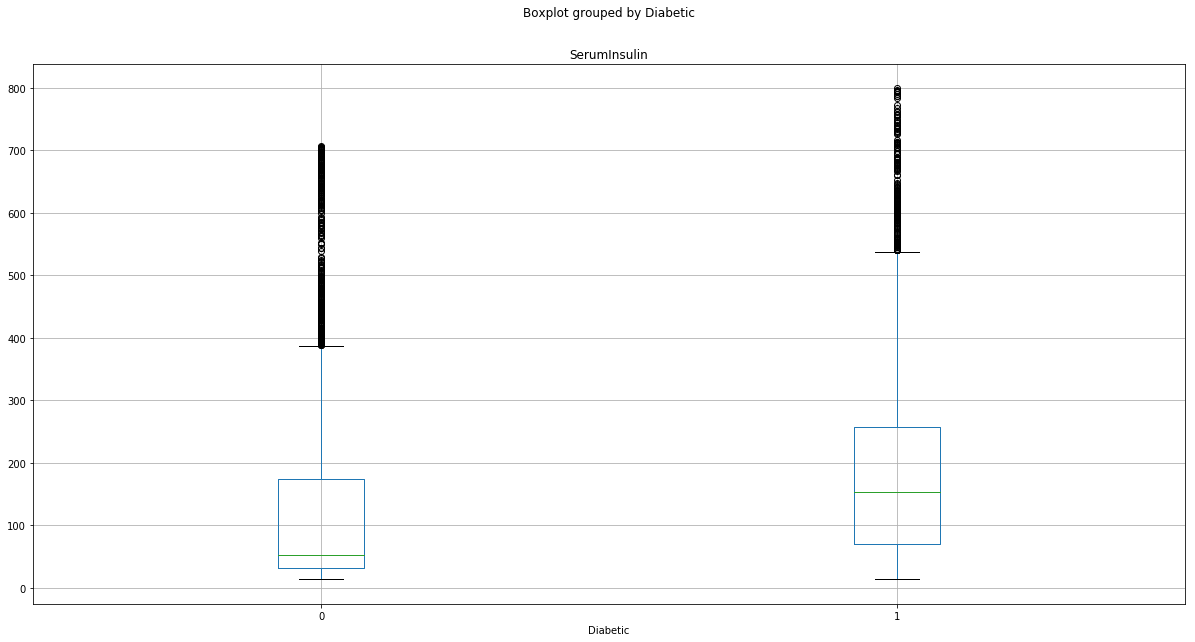

For feature:  BMI


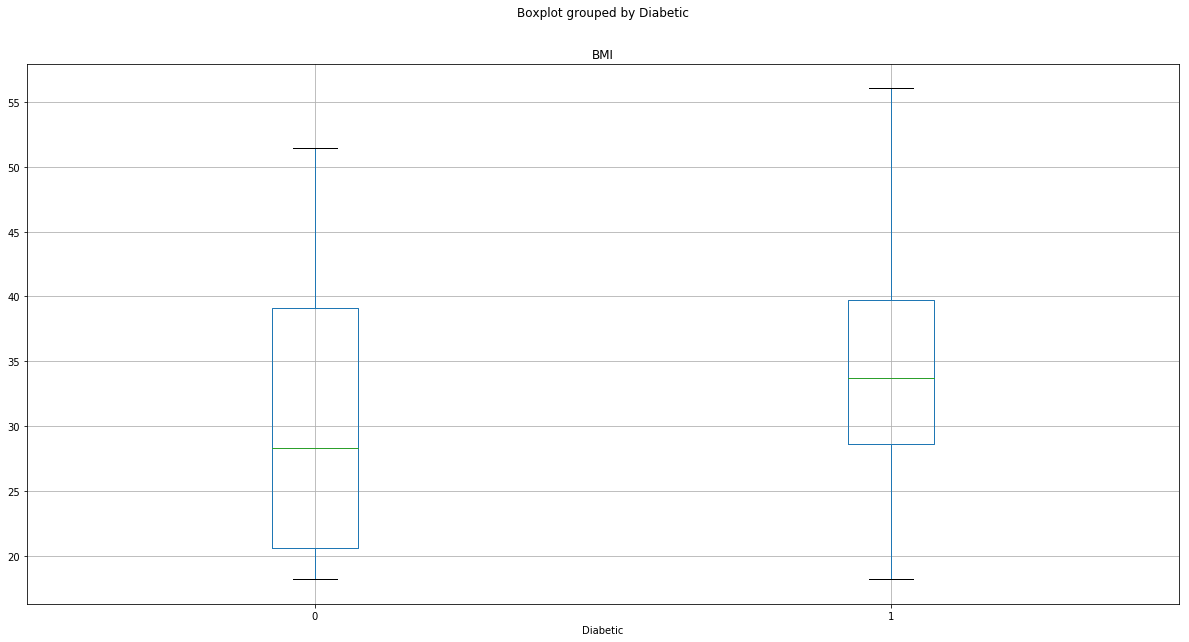

For feature:  DIABETESPEDIGREE


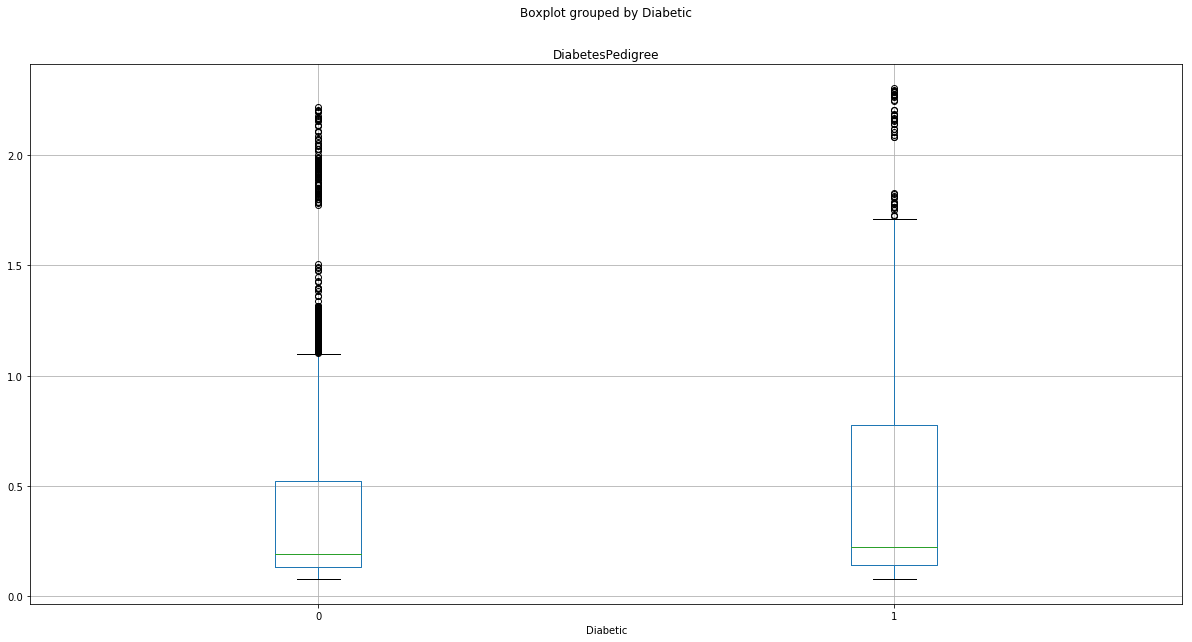

For feature:  AGE


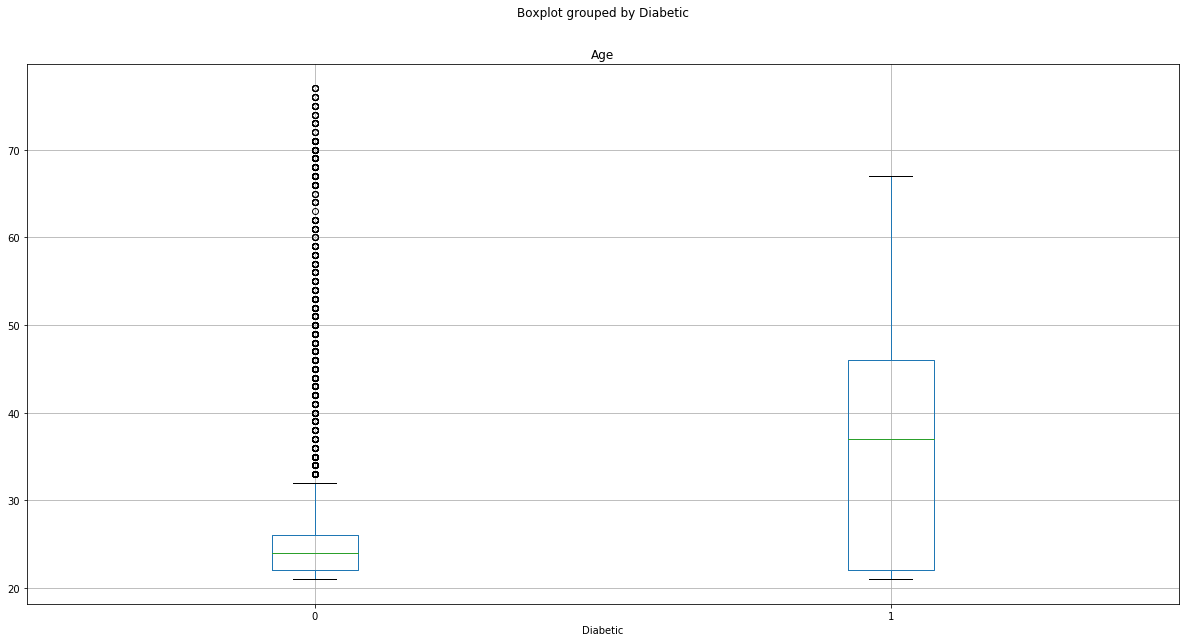

In [28]:
categorical_features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for feature in categorical_features:
    print('For feature: ', feature.upper())
    df.boxplot(feature, by='Diabetic', figsize=(20, 10))
    plt.show()

In [29]:
# Now let's split the data into train and test split
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
class_ = 'Diabetic'

X, Y = df[features].values, df[class_].values
for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", Y[n])
    
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0)

print('The training set and testing set size is: ', train_X.shape[0], test_X.shape[0])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1
The training set and testing set size is:  10500 4500


## Regularization

Now before we train our classifier on our training set, we need to look for regularization. Sometimes when we have less data points and more features we mind end with the problem of overfitting the model on our data. To prevent this there are multiple things to look for, few measures are listed below.

1. **Reduce the number of features**:
    This problem is called curse of dimensionality. We need to look for what features are in our dataset are important to give us a good generalized model. More features give us more information for the data but it also lets the model overfit. Finding out what features are the best and most useful for generalizing the model is important.

2. **Regularization**:
    Regularization is a method for applying penalty to the final loss value. The regularization more often used is the L2 regularization. Regularization is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data. 

In [30]:
regularize = 0.1

model = LogisticRegression(C=1/regularize, solver='liblinear').fit(train_X, train_Y)
print(model)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [31]:
test_preds = model.predict(test_X)

print('Predicted labels:', test_preds)
print('Actual labels:', test_Y)

Predicted labels: [0 0 0 ... 0 1 0]
Actual labels: [0 0 1 ... 1 1 1]


In [32]:
# Lets see the accuracy of the model
print('Accuracy:', accuracy_score(test_Y, test_preds))

Accuracy: 0.7891111111111111


## Accuracy
Accuracy is a very useful metric, however be careful on how to intrepret it. Accuracy is a measure to tell how many classes were predicted correctly. For this example let's say the training set only had 3% of diabetic examples, the trained model will predict non-diabetic always. this will give the model a 97% accuracy.

Let's look at other metrics

In [34]:
print(classification_report(test_Y, test_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



let's look at each of them carefully one by one, but before that let's see what a confusion matrix is. 

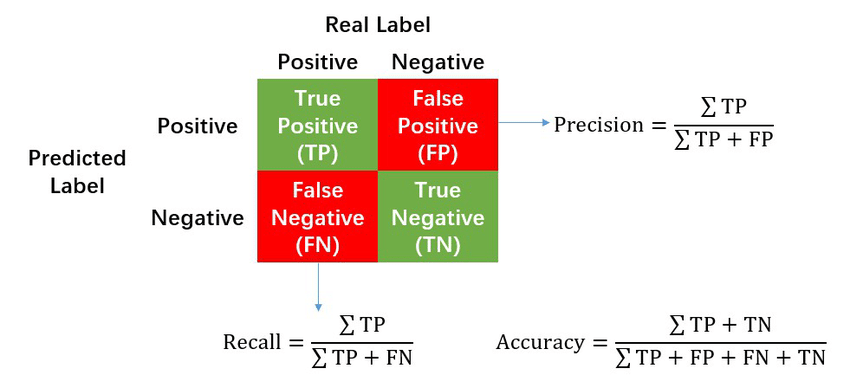

## Confusion matrix

**True positive**: When the real class is positive '0' and the predicted class is also positive '0'

**True negative**: When the real class is negative '1' and the predicted class is also negative '1'

**False positive**: When the real class is negative '1' but the predicted class is positive '0'

**False negative**: When the real class is positive '0' but the predicted class is negative '1'


## Precision metric
Precision tells us from the prediction made by the model for a class (let's say positive class) how many are actually positive. Therefore precision is taken for both classes separately.

Above shows example for precision for positive class

## Recall metric
Recall tells us from all the predicitons by the model for a class (let's say psoitive) how many did it get right compared to actual positive values. Therefore recall is taken for both classes separately

Above shows example of precision for positive class


**F1 score** is an score value calculated by averaging the precision and recall values

In [36]:
print(confusion_matrix(test_Y, test_preds))

[[2638  348]
 [ 601  913]]


Models like logistic regression do not provide tthe class prediction as values '0' and '1'. Rather they provide a prediction of a class. So, let's say the model we have has a threshold of 0.5. If the model predicts probability **P(y) > 0.5**, the predicted class is '1', and if it predicts **P(y) <= 0.5**, the predicted class is '0'.

In [37]:
# Lets predict the probability instead of the predicted class
test_prob = model.predict_proba(test_X)
print(test_prob)

[[0.81659372 0.18340628]
 [0.96294706 0.03705294]
 [0.80851903 0.19148097]
 ...
 [0.60684387 0.39315613]
 [0.10699466 0.89300534]
 [0.63905855 0.36094145]]


In [45]:
# Now to check the models performance on various threshold values, lets plot a ROC curve
false_positive_rate, true_positive_rate, threshold = roc_curve(test_Y, test_prob[:, 1])

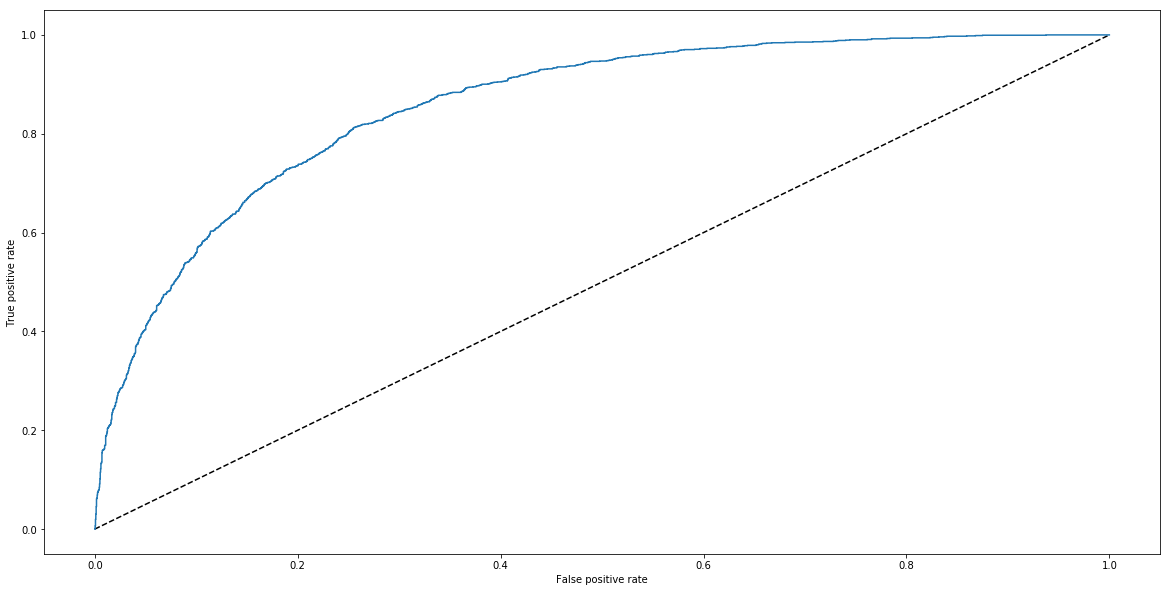

In [46]:
plt.figure(figsize=(20, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [48]:
# Now lets see the AUC score
print(str(roc_auc_score(test_Y, test_prob[:,1])))

0.856850684081858


In [51]:
# Now that we can see without pre-processing and all the model 
# performs better than simple guessing, so lets create pipeline to do that
numeric_features = [0,1, 2, 3, 4, 5, 6, 7]
numeric_transform = Pipeline(steps=[('scalar', StandardScaler())])
preprocess = ColumnTransformer(transformers=[
    ('num', numeric_transform, numeric_features)
])

pipe_line = Pipeline(steps=([('pre_process', preprocess), 
                             ('logist_regress', LogisticRegression(C=1/regularize, solver='liblinear'))]))

model = pipe_line.fit(train_X, train_Y)
print(model)

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scalar',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])],
                                   verbose=False)),
                ('logist_regress',
                 Logistic

In [55]:
test_preds = model.predict(test_X)
test_prob = model.predict_proba(test_X)

print(confusion_matrix(test_Y, test_preds))
print(classification_report(test_Y, test_Y))
print('Accuracy:', round(accuracy_score(test_Y, test_preds), 2))
print('AUC score: ', round(roc_auc_score(test_Y, test_prob[:,1]), 2))

[[2636  350]
 [ 600  914]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2986
           1       1.00      1.00      1.00      1514

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

Accuracy: 0.79
AUC score:  0.86


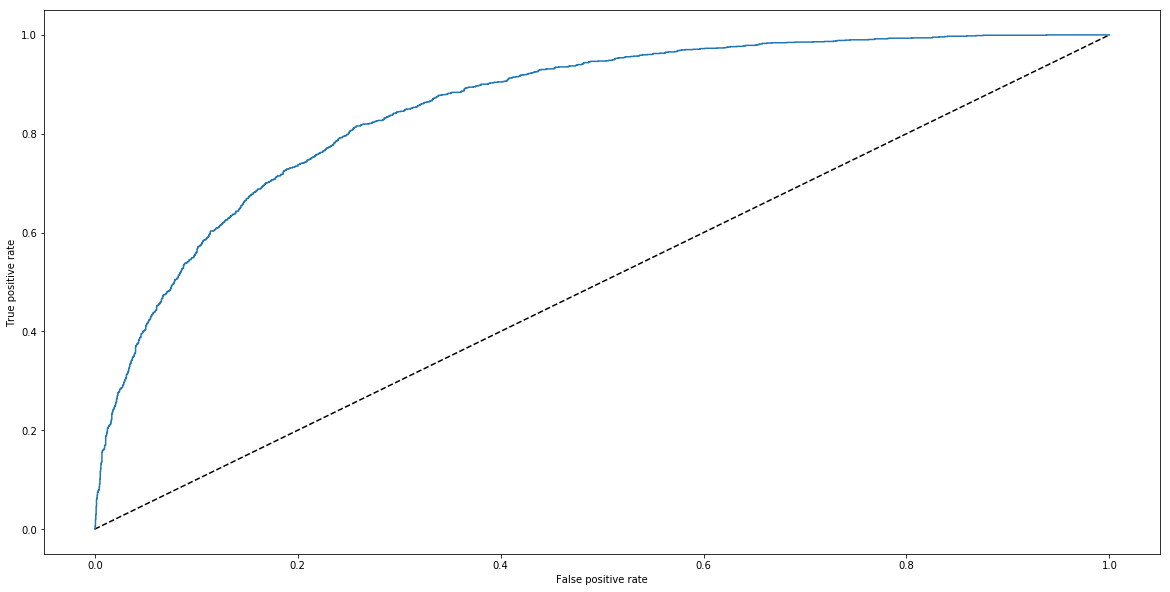

In [56]:
false_positive_rate, true_positive_rate, threshold = roc_curve(test_Y, test_prob[:, 1])

plt.figure(figsize=(20, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Now, let's looks at other classification algorithms

1. **Support vector machine**
2. **Decision tree classifier**
3. **Ensemble algorithms**

## Ensemble random forest

In [62]:
# We will use the same pipeline, only change the classification algorithm on it
pipe_line = Pipeline(steps=[('pre_process', preprocess), 
                           ('Forest_classifier', RandomForestClassifier(min_samples_leaf=3, n_estimators=50))])

In [63]:
model = pipe_line.fit(train_X, train_Y)
print(model)

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scalar',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])],
                                   verbose=False)),
                ('Forest_classifier',
                 Rando

In [65]:
test_preds = model.predict(test_X)
test_prob = model.predict_proba(test_X)

print('Report:', classification_report(test_Y, test_Y))
print('Accuracy:', round(accuracy_score(test_Y, test_preds), 2))
print('AUC score: ', round(roc_auc_score(test_Y, test_prob[:,1]), 2))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2986
           1       1.00      1.00      1.00      1514

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

Accuracy: 0.93
AUC score:  0.98


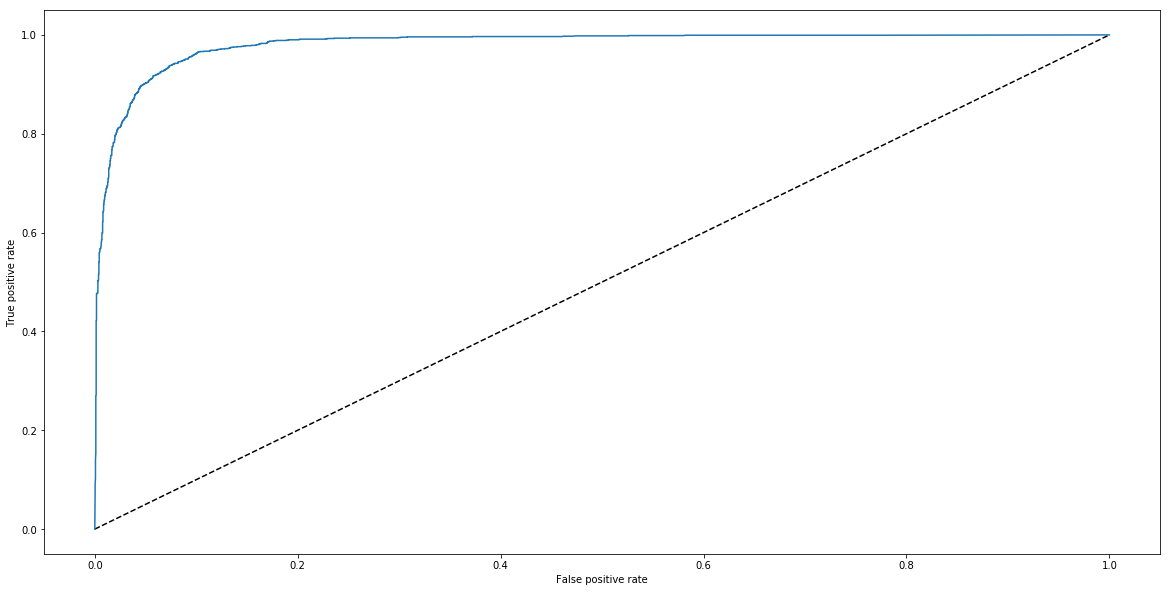

In [66]:
false_positive_rate, true_positive_rate, threshold = roc_curve(test_Y, test_prob[:, 1])

plt.figure(figsize=(20, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## Support vector machine

## Naive bayes